# FASTAI DEMO

Misty Nodine, February 18, 2020

The home repo for this jupyter notebook is at https://github.com/mistynodine/PythonModules/tree/master/APUG_2020Feb18.

This demo is for the fastai package.

If you want to learn more about fastai, there is a really good introductory class at https://course.fast.ai, in Lessons(Part1). It does not require extensive knowledge of neural networks or machine learning, just a decent background in Python. It also provides extensive directions on running these compute-intensive processes on various cloud platforms.

The github repo for the class is at https://github.com/fastai/course-v3.

In [1]:
# the following three lines are suggested by the fast.ai course
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# the fast.ai library
from fastai import *
from fastai.vision import *

# to inspect the directory
import os
from pathlib import Path

# data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# images
from PIL import Image

# Copy data from Fastai S3 Bucket

In [3]:
# The source of the MNIST data on fastai
url = URLs.MNIST
path = untar_data(url)
print(path)

/Users/mistynodine/.fastai/data/mnist_png


In [4]:
print("Training data stats")
for i in range(10):
    print(path/'training/{}'.format(i), len((path/'training/{}'.format(i)).ls()))

print(sum([len((path/'training/{}'.format(i)).ls()) for i in range(10)]))

Training data stats
/Users/mistynodine/.fastai/data/mnist_png/training/0 5923
/Users/mistynodine/.fastai/data/mnist_png/training/1 6742
/Users/mistynodine/.fastai/data/mnist_png/training/2 5958
/Users/mistynodine/.fastai/data/mnist_png/training/3 6131
/Users/mistynodine/.fastai/data/mnist_png/training/4 5842
/Users/mistynodine/.fastai/data/mnist_png/training/5 5421
/Users/mistynodine/.fastai/data/mnist_png/training/6 5918
/Users/mistynodine/.fastai/data/mnist_png/training/7 6265
/Users/mistynodine/.fastai/data/mnist_png/training/8 5851
/Users/mistynodine/.fastai/data/mnist_png/training/9 5949
60000


In [5]:
print("Testing data stats")
for i in range(10):
    print(path/'testing/{}'.format(i), len((path/'testing/{}'.format(i)).ls()))
print(sum([len((path/'testing/{}'.format(i)).ls()) for i in range(10)]))

Testing data stats
/Users/mistynodine/.fastai/data/mnist_png/testing/0 980
/Users/mistynodine/.fastai/data/mnist_png/testing/1 1135
/Users/mistynodine/.fastai/data/mnist_png/testing/2 1032
/Users/mistynodine/.fastai/data/mnist_png/testing/3 1010
/Users/mistynodine/.fastai/data/mnist_png/testing/4 982
/Users/mistynodine/.fastai/data/mnist_png/testing/5 892
/Users/mistynodine/.fastai/data/mnist_png/testing/6 958
/Users/mistynodine/.fastai/data/mnist_png/testing/7 1028
/Users/mistynodine/.fastai/data/mnist_png/testing/8 974
/Users/mistynodine/.fastai/data/mnist_png/testing/9 1009
10000


# Prepare Data For Training

In [7]:
tfms = get_transforms(do_flip=False)  # Transforms
batch_size = 64

data = ImageDataBunch.from_folder(path, ds_tfms=tfms, bs=batch_size, size=26, train='training', valid='testing')
data

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
9,9,9,9,9
Path: /Users/mistynodine/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
9,9,9,9,9
Path: /Users/mistynodine/.fastai/data/mnist_png;

Test: None

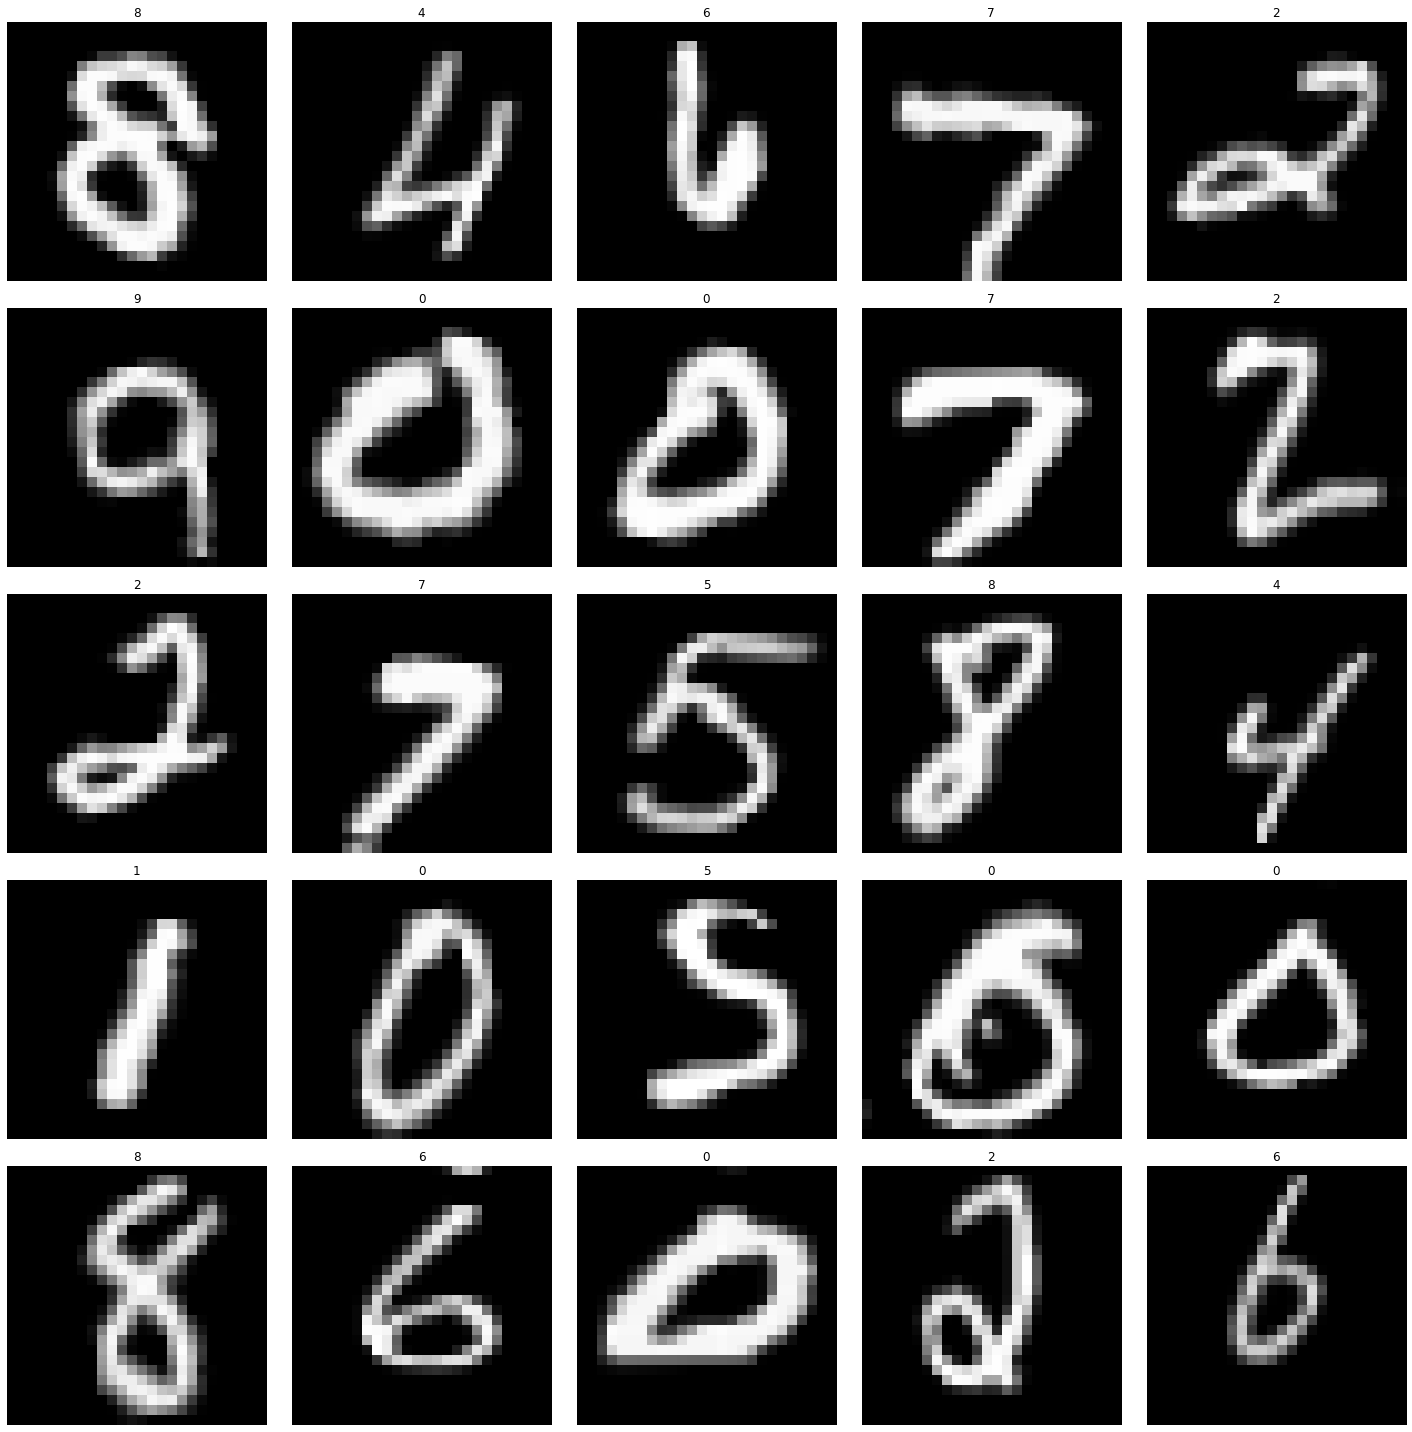

In [8]:
# Show some examples
data.show_batch()

In [9]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Train neural net

In [11]:
num_epochs = 1   # The number of times you want to go through the training data

learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(num_epochs)

epoch,train_loss,valid_loss,accuracy,time
0,0.509855,0.285627,0.910200,09:51


# Interpretation

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

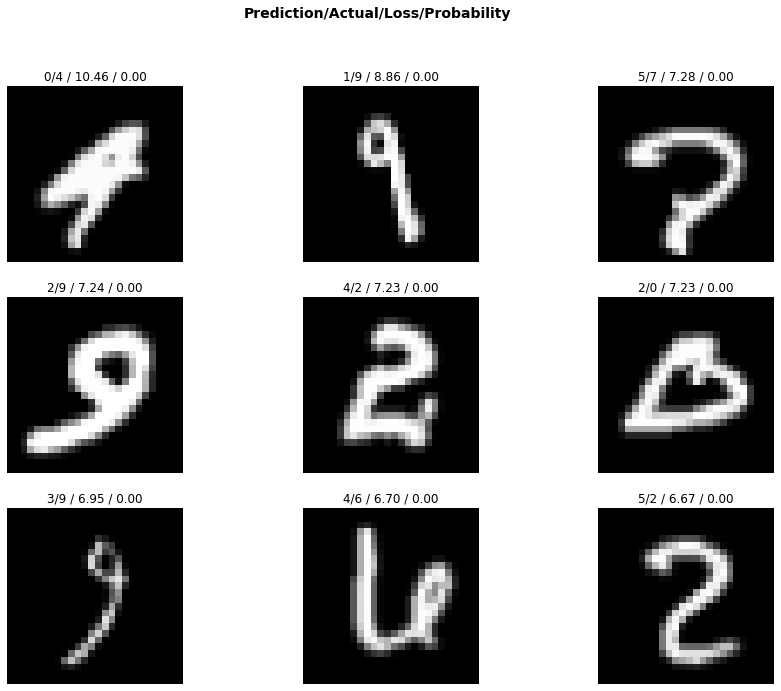

In [13]:
# Plot the images with the most losses
interp.plot_top_losses(9, figsize=(15,11))

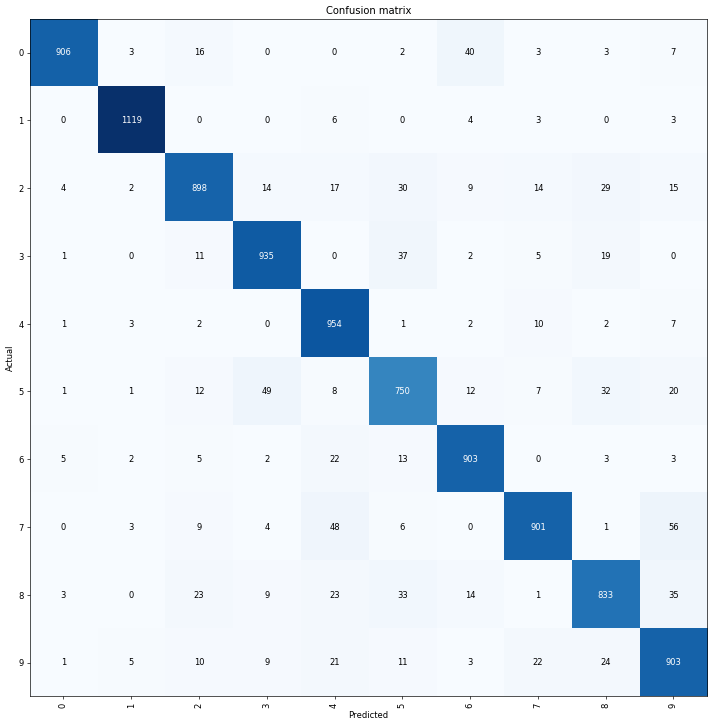

In [14]:
# Plot the confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [15]:
# Plot the most confused
interp.most_confused(min_val=2)

[('7', '9', 56),
 ('5', '3', 49),
 ('7', '4', 48),
 ('0', '6', 40),
 ('3', '5', 37),
 ('8', '9', 35),
 ('8', '5', 33),
 ('5', '8', 32),
 ('2', '5', 30),
 ('2', '8', 29),
 ('9', '8', 24),
 ('8', '2', 23),
 ('8', '4', 23),
 ('6', '4', 22),
 ('9', '7', 22),
 ('9', '4', 21),
 ('5', '9', 20),
 ('3', '8', 19),
 ('2', '4', 17),
 ('0', '2', 16),
 ('2', '9', 15),
 ('2', '3', 14),
 ('2', '7', 14),
 ('8', '6', 14),
 ('6', '5', 13),
 ('5', '2', 12),
 ('5', '6', 12),
 ('3', '2', 11),
 ('9', '5', 11),
 ('4', '7', 10),
 ('9', '2', 10),
 ('2', '6', 9),
 ('7', '2', 9),
 ('8', '3', 9),
 ('9', '3', 9),
 ('5', '4', 8),
 ('0', '9', 7),
 ('4', '9', 7),
 ('5', '7', 7),
 ('1', '4', 6),
 ('7', '5', 6),
 ('3', '7', 5),
 ('6', '0', 5),
 ('6', '2', 5),
 ('9', '1', 5),
 ('1', '6', 4),
 ('2', '0', 4),
 ('7', '3', 4),
 ('0', '1', 3),
 ('0', '7', 3),
 ('0', '8', 3),
 ('1', '7', 3),
 ('1', '9', 3),
 ('4', '1', 3),
 ('6', '8', 3),
 ('6', '9', 3),
 ('7', '1', 3),
 ('8', '0', 3),
 ('9', '6', 3),
 ('0', '5', 2),
 ('2', '1